## Project 1: When Disaster strikes, will you be ready? 
### How the market responds to disasters by looking at correlations between sectors and when the US econmoy dips over 2.5% using GDP data going back 20 years.
### Scott, Jason, Jatinder

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import calendar
import requests as r
#import quandl
#import plaid

%matplotlib inline

In [2]:
#df=pd.read_csv('Dis_Data.csv',parse_dates=True, infer_datetime_format=True)
df=pd.read_excel('Dis_Data_World.xlsx', index_col='Year', parse_dates=True)
df_sliced = df[['Start Month','Country','Latitude', 'Longitude','Disaster Group', 'Disaster Type', 'Total Deaths', 'No Affected']]

df_sliced[df_sliced['Country'] == 'United States of America (the)']

,Start Month,Country,Latitude,Longitude,Disaster Group,Disaster Type,Total Deaths,No Affected
Year,,,,,,,,
1900-01-01,9.0,United States of America (the),NaN,NaN,Natural,Storm,6000.0,NaN
1903-01-01,NaN,United States of America (the),NaN,NaN,Natural,Storm,98.0,NaN
1906-01-01,4.0,United States of America (the),37.67,-122.48,Natural,Earthquake,700.0,NaN
1906-01-01,NaN,United States of America (the),NaN,NaN,Natural,Storm,164.0,NaN
1906-01-01,NaN,United States of America (the),NaN,NaN,Natural,Storm,134.0,NaN
1909-01-01,9.0,United States of America (the),NaN,NaN,Natural,Flood,72.0,NaN
1909-01-01,NaN,United States of America (the),NaN,NaN,Natural,Storm,350.0,NaN
1909-01-01,NaN,United States of America (the),NaN,NaN,Natural,Storm,41.0,NaN
1910-01-01,NaN,United States of America (the),NaN,NaN,Natural,Storm,30.0,NaN


In [3]:
df_sliced.head(10)

,Start Month,Country,Latitude,Longitude,Disaster Group,Disaster Type,Total Deaths,No Affected
Year,,,,,,,,
1900-01-01,NaN,Cabo Verde,NaN,NaN,Natural,Drought,11000.0,NaN
1900-01-01,NaN,India,NaN,NaN,Natural,Drought,1250000.0,NaN
1902-01-01,4.0,Guatemala,14,-91,Natural,Earthquake,2000.0,NaN
1902-01-01,4.0,Guatemala,NaN,NaN,Natural,Volcanic activity,1000.0,NaN
1902-01-01,10.0,Guatemala,NaN,NaN,Natural,Volcanic activity,6000.0,NaN
1903-01-01,4.0,Canada,NaN,NaN,Natural,Mass movement (dry),76.0,NaN
1903-01-01,NaN,Comoros (the),NaN,NaN,Natural,Volcanic activity,17.0,NaN
1904-01-01,11.0,Bangladesh,NaN,NaN,Natural,Storm,NaN,NaN
1905-01-01,8.0,Canada,NaN,NaN,Natural,Mass movement (dry),18.0,NaN


In [4]:
df.loc['1900'].head()

,Dis No,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,Country,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
Year,,,,,,,,,,,,,,,,,,,,,
1900-01-01,1900-9002-CPV,9002,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,Cabo Verde,...,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1900-01-01,1900-9001-IND,9001,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,India,...,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1900-01-01,1900-0003-USA,3,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Kill,United States of America (the),...,8.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,30000.0,3.261389
1900-01-01,1900-0007-JAM,7,Natural,Biological,Epidemic,Viral disease,NaN,Gastroenteritis,Kill,Jamaica,...,13.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1900-01-01,1900-0006-JAM,6,Natural,Hydrological,Flood,NaN,NaN,NaN,Kill,Jamaica,...,6.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389


In [5]:
df_sliced.head(10)

,Start Month,Country,Latitude,Longitude,Disaster Group,Disaster Type,Total Deaths,No Affected
Year,,,,,,,,
1900-01-01,NaN,Cabo Verde,NaN,NaN,Natural,Drought,11000.0,NaN
1900-01-01,NaN,India,NaN,NaN,Natural,Drought,1250000.0,NaN
1902-01-01,4.0,Guatemala,14,-91,Natural,Earthquake,2000.0,NaN
1902-01-01,4.0,Guatemala,NaN,NaN,Natural,Volcanic activity,1000.0,NaN
1902-01-01,10.0,Guatemala,NaN,NaN,Natural,Volcanic activity,6000.0,NaN
1903-01-01,4.0,Canada,NaN,NaN,Natural,Mass movement (dry),76.0,NaN
1903-01-01,NaN,Comoros (the),NaN,NaN,Natural,Volcanic activity,17.0,NaN
1904-01-01,11.0,Bangladesh,NaN,NaN,Natural,Storm,NaN,NaN
1905-01-01,8.0,Canada,NaN,NaN,Natural,Mass movement (dry),18.0,NaN


## GDP DATA

In [6]:
gdp_data =pd.read_csv('World_GDP_Data.csv')

gdpCap_data=pd.read_csv('World_GDP_Capita.csv')

In [7]:
df_gdp_sliced =gdp_data.loc[:, '2000':]

In [31]:
#gdp_sliced =gdp_sliced.iloc[249]
usa_gdp_data = df_gdp_sliced.iloc[[249]].T
usa_gdp_data.head()

,249
2000,1.025230e+13
2001,1.058180e+13
2002,1.093640e+13
2003,1.145820e+13
2004,1.221370e+13


In [9]:
usa_gdp_data.columns=['USA']

In [10]:
usa_gdp_data.loc['2019'] = 2.13e+13

In [11]:
usa_gdp_data = usa_gdp_data[['USA']]

In [30]:
usa_gdp_data.head()

,USA
2000,1.025230e+13
2001,1.058180e+13
2002,1.093640e+13
2003,1.145820e+13
2004,1.221370e+13


In [13]:
usa_gdp_data.to_csv('Usa_gdp_data.csv')

In [14]:
disaster_data = df_sliced

In [15]:
disaster_data.to_csv('Disaster_data.csv')

## USA: GDP Cap since 2000

In [16]:
gdp_cap_df = gdpCap_data.loc[:, '2000':]

In [17]:
usa_gdp_cap = pd.DataFrame(gdp_cap_df.iloc[249])

In [18]:
usa_gdp_cap.columns = ['USA']

In [19]:
usa_gdp_cap.loc['2019'] = 65112

In [29]:
usa_gdp_cap.head()

,USA
2000,36334.90878
2001,37133.24281
2002,38023.16111
2003,39496.48588
2004,41712.80107


# Plot last 20 years of US GDP per capita 

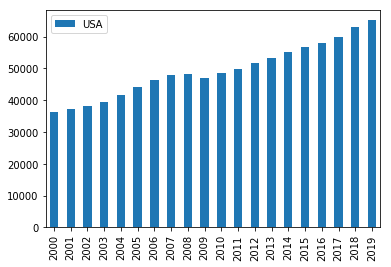

In [33]:
usa_gdp_cap.plot.bar()

### Read in stock jumps - 

In [22]:
stock_jumps_data = pd.read_csv('stock_jumps.csv')
stock_jumps_data.head()

,Date,Return,(#) Ease of Coding,(#) Journalist Confidence,Clarity,Number of Coders,Article Title,Newspaper,Article Link/Location,Commodities,...,Otherpol,Reg,Sovmil,Taxes,Terror,Unknown,Policy,Year,Month,Day
0,4/21/2020,-0.030675,2.000,2.333,-0.333,3,U.S. Stocks Drop as Oil Market Shudders,Wall Street Journal,https://www.dropbox.com/s/sgq7t10c6dboiwc/WSJ_...,1.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.000,2020,4,21
1,4/17/2020,0.026794,2.333,2.333,-0.060,3,Stocks Rally to Close Second Straight Week \no...,Wall Street Journal,https://www.dropbox.com/s/sgq7t10c6dboiwc/WSJ_...,0.0,...,0.333,0.0,0.0,0.0,0.0,0.0,0.333,2020,4,17
2,4/14/2020,0.030573,2.000,2.000,-0.531,3,Stocks Gain as U.S. Weighs Restarting \nEconomy,Wall Street Journal,https://www.dropbox.com/s/sgq7t10c6dboiwc/WSJ_...,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.000,2020,4,14
3,4/8/2020,0.034056,2.667,2.333,0.632,3,Stocks Close Higher After bout of volatility,Wall Street Journal,https://www.dropbox.com/s/sgq7t10c6dboiwc/WSJ_...,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.000,2020,4,8
4,4/6/2020,0.070331,2.200,2.800,0.333,5,"Dow Industrials Surge About 1,600 Points at\nS...",Wall Street Journal,https://www.dropbox.com/s/sgq7t10c6dboiwc/WSJ_...,0.0,...,0.200,0.0,0.0,0.0,0.0,0.0,0.200,2020,4,6


In [23]:
#jumps_year = stock_jumps_data.groupby('Year').mean()
jumps_year = stock_jumps_data[['Year','Month', 'Return']]
jumps_year.head()

,Year,Month,Return
0,2020,4,-0.030675
1,2020,4,0.026794
2,2020,4,0.030573
3,2020,4,0.034056
4,2020,4,0.070331


In [24]:
jumps_year = jumps_year.loc[:2000]

In [25]:
jumps_year.set_index('Year', inplace=True)

In [27]:
jumps_year = jumps_year.loc[:2000]

In [32]:
jumps_year.head()

,Month,Return
Year,,
2020,4,-0.030675
2020,4,0.026794
2020,4,0.030573
2020,4,0.034056
2020,4,0.070331


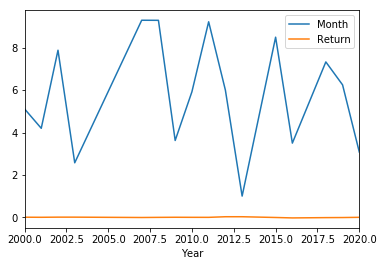

In [28]:
jumps_year.groupby('Year').mean().plot()

In [13]:
for x, y in df2.iterrows():
    year=str(y['Year'])
    mboo=pd.isnull(y['Start Month'])
    dboo=pd.isnull(y['Start Day'])
    day=0
    if mboo and dboo:
        df2.iloc[x, 0]=pd.to_datetime(year)
    elif mboo:
        df2.iloc[x, 0]=pd.to_datetime(year)
    elif dboo:
        df2.iloc[x, 0]=pd.to_datetime(year+'-'+str(int(y['Start Month'])))
    else:
        #print(f'year is {year} month is {str(int(y.iloc[1]))+str(int(y.iloc[2]))}\n')
        day=int(y['Start Day'])
       
        month=int(y['Start Month'])
        maxi=calendar.monthrange(int(year), month)[1]
        day=min(maxi, day)
            
        df2.iloc[x, 0]=pd.to_datetime(year+'-'+str(int(y['Start Month']))+'-'+str(day))
        #print(f'{y}\n')

In [ ]:
for x,y in df2.head(10).iterrows():
    if x+dt.timedelta(1) in df_jumps.head(10).index:
        print(x)

In [ ]:
#for x, y in dff1.iterrows():
 #   if x+dt.timedelta(1) in dff.index:
dff1.insert(0, 'Return', np.nan)

In [ ]:
for x, y in dff1.iterrows():
    if x+dt.timedelta(1) in dff.index:
        loc=dff.index.get_loc(x+dt.timedelta(1))
        dff1.loc[x, 'Return']=dff.iloc[loc, 0]

In [ ]:
dff1.index[0]+dt.timedelta(1)>dff.index[0]

In [ ]:
l=[2,5,6,7]

In [ ]:
def match_returns(df_disaster, df_jumper, window=1):
    df1=df_disaster.copy()
    df2=df_jumper.copy()
    df1.insert(0, 'Returns', np.nan)
    for x, y in df1.iterrows():
        for win in range(0, window+1):
            if x+dt.timedelta(win) in df2.index:
                location=df2.index.get_loc(x+dt.timedelta(win))
                df1.loc[x, 'Returns']=df2.iloc[location, 0]
                break
                
    return df1

In [ ]:
df2_rets=match_returns(df2, df_jumps)

In [ ]:
#df2_rets.drop(columns=['Return'], inplace=True)

In [ ]:
dff1.index.get_loc('2000-05-05')==[]

In [ ]:
df2_rets.head()

In [ ]:
df2_rets['Disaster Type'].value_counts()

In [ ]:
df_gdp=pd.read_csv('World_GDP_Data.csv')
df_gdpC=pd.read_csv('World_GDP_Capita.csv')

In [ ]:
df2_rets.columns

In [ ]:
#df_gdp.drop(columns=['Indicator Name', 'Indicator Code'], inplace=True)
#df_gdpC.drop(columns=['Indicator Name', 'Indicator Code'], inplace=True)

In [ ]:
#df_gdpC.shift

In [ ]:
df_capita_change=df_gdpC.loc[:,'1960':]/df_gdpC.loc[:,'1960':].shift(1, axis=1)

In [ ]:
df_gdpC_change=pd.concat([df_gdpC.iloc[:,0:2], df_capita_change], axis=1)

In [ ]:
df_change=df_gdp.loc[:,'1960':]/df_gdp.loc[:,'1960':].shift(1, axis=1)
df_gdp_change=pd.concat([df_gdp.iloc[:,0:2], df_change], axis=1)

In [ ]:
pd.to_datetime(df_gdpC_change.T.index[2])

In [ ]:
#df2_rets.columns

In [ ]:
df_gdpC_change.head()

In [ ]:
country_code = pc.country_name_to_country_alpha3("United Arab Emirates", cn_name_format="default")
print(country_code)
cv=pc.country_alpha3_to_country_alpha2(country_code)
continent_name = pc.country_alpha2_to_continent_code(cv)
print(continent_name)

In [ ]:
cc3=df_gdpC_change['Country Name']
s=pd.Series()
df_gdpC_changeC=df_gdpC_change.copy()
df_gdpC_changeC.insert(2, 'Continent', np.nan)
for x, y in df_gdpC_changeC.iterrows():
    k=pctry.countries.get(alpha_3=y[1])
    #print(f'y is {y[0]} and k is {k}\n')
    if not k==None:
        
        cc2=pc.country_name_to_country_alpha2(k.name)
        if cc2=='SX' or cc2=='TL':
            continue
        continent=pc.country_alpha2_to_continent_code(cc2)
        df_gdpC_changeC.loc[x, 'Continent']=continent
    

In [ ]:
#cc3=df_gdpC_change['Country Code']
pctry.countries.get(alpha_3='ABW').name

In [ ]:
#country_code = pc.country_name_to_country_alpha2('ARB', cn_name_format="default")

In [ ]:
#pc.country_alpha2_to_continent_code('TL')

In [ ]:
import pycountry as pctry
pctry.historic_countries.get(alpha_2='TL')

In [ ]:
pctry.countries.get(alpha_2='TL')

In [ ]:
k==None

In [ ]:
k

In [ ]:
df_gdpC_changeC.loc[df_gdpC_changeC['Country Code']=='TLS']

In [ ]:
#df_gdpC_changeC.loc[df_gdpC_changeC['Continent'].isna()]

In [ ]:
df_gdpC_changeC

In [ ]:
cc3=df_gdp_change['Country Name']
s=pd.Series()
df_gdp_changeC=df_gdp_change.copy()
df_gdp_changeC.insert(2, 'Continent', np.nan)
for x, y in df_gdp_changeC.iterrows():
    k=pctry.countries.get(alpha_3=y[1])
    #print(f'y is {y[0]} and k is {k}\n')
    if not k==None:
        
        cc2=pc.country_name_to_country_alpha2(k.name)
        if cc2=='SX' or cc2=='TL':
            continue
        continent=pc.country_alpha2_to_continent_code(cc2)
        df_gdp_changeC.loc[x, 'Continent']=continent
    

In [ ]:
df_gdp_changeC

### THE DATAFRAMES 
* Regular GDP with percent change: df_gdp_change     then copied to df_gdp_changeC 
* GDP per capita with percent change: df_gdpC_change    then copied to df_gdpC_changeC 
* Disaster df: df2
* stock jumps df: df_jumps
* Disaster + stock market jump returns matched: df2_rets